## Loading Library

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.dates as mdates

!pip install mlxtend==0.23.1

# **A Day in the Life of a Data Analyst: Unraveling Insights from The Bread Basket Dataset**

---

**Thursday, December 5, 2024** <br>
As the sun rises on another busy Thursday, I settle into my workspace, ready to dive into The Bread Basket dataset. This dataset is a treasure trove of information, capturing the essence of customer transactions at a local bakery. My goal today is to uncover insights that can help the bakery optimize its offerings and enhance customer satisfaction.


## **Loading Dataset**
I start my day by loading the dataset into my Python environment. Yesterday, I got the dataset from my [Client](https://raw.githubusercontent.com/michellechandraa/TutorDataMining/refs/heads/main/bread%20basket.csv). Using Pandas, I import the data and take a moment to familiarize myself with its structure.

In [2]:
#1
url = "://raw.githubusercontent.com/valentraphael/Data-Mining/rehttpsfs/heads/main/bread%20basket.csv"
df= pd.read_csv(url)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


As I glance through the initial rows, I see the columns: Transaction, Item, date_time, period_day, and weekday_weekend. Each transaction is unique, and I can already sense the potential insights hidden within.

## **Exploratory Data Analysis (EDA)**
With the dataset loaded, I transition into Exploratory Data Analysis (EDA). This phase is crucial for understanding the data better and identifying patterns.
### **Data Overview**
I begin by checking for missing values and summarizing the basic statistics of the dataset.

In [4]:
#2 info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
#3 check missing values
df.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0
Transaction,0
Item,0
date_time,0
period_day,0
weekday_weekend,0


4. The overview reveals a dataset with no missing values in any of the columns.(fill that blank on the section below)

### **Transaction Trends**
Next, I analyze transaction trends over time. I extract the date and hour from the date_time column to see how customer purchases vary throughout the day and week. Then, I visualize the daily transaction trends to identify peak days and times for customer activity.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-a153dfd85d34>:6: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['date_time'] = pd.to_datetime(df['date_time'])


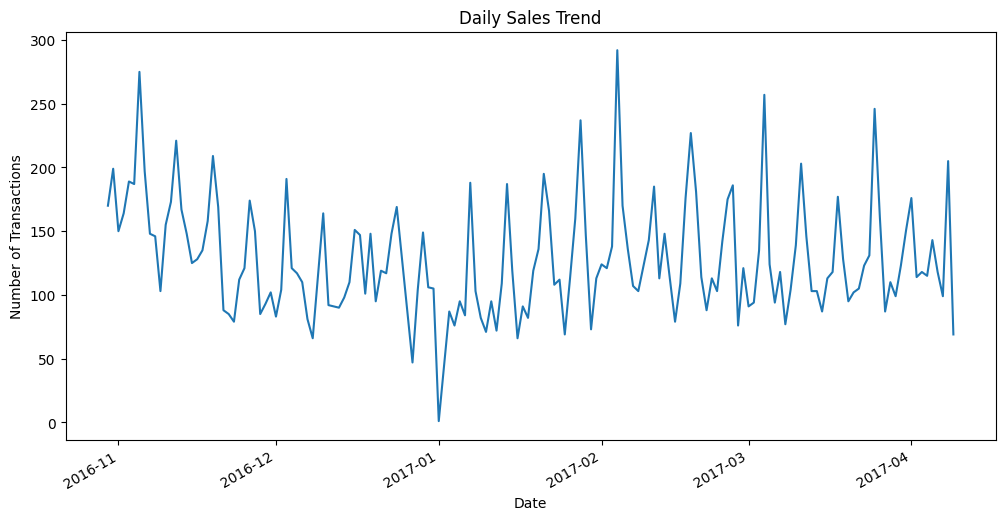

In [9]:
# 5
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_time' column to datetime objects
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract date and hour
df['Date'] = df['date_time'].dt.date
df['Hour'] = df['date_time'].dt.hour

# Group by date and count transactions
daily_sales = df.groupby('Date')['Transaction'].count()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values)

# Format x-axis to show dates at monthly intervals
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()


plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Daily Sales Trend')
plt.show()



Oh my God, it's so difficult to get insights from this visualization, but it seems like there might be a trend to uncover. Let me try separating it by the perspective of hour, time, day, day_name, month, and year by adding each of those variabels into the dataframe.

In [10]:
# 6
# Convert 'date_time' column to datetime objects
df['date_time'] = pd.to_datetime(df['date_time'])

# Extract date and time components
df['Date'] = df['date_time'].dt.date
df['Hour'] = df['date_time'].dt.hour
df['Day'] = df['date_time'].dt.day
df['Day_Name'] = df['date_time'].dt.day_name()
df['Month'] = df['date_time'].dt.month
df['Year'] = df['date_time'].dt.year

# Display the updated DataFrame
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Transaction,Item,date_time,period_day,weekday_weekend,Date,Hour,Day,Day_Name,Month,Year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,2016-10-30,9,30,Sunday,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,30,Sunday,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,2016-10-30,10,30,Sunday,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,30,Sunday,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,2016-10-30,10,30,Sunday,10,2016



Alright, now I can easily create a visualization of monthly sales.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


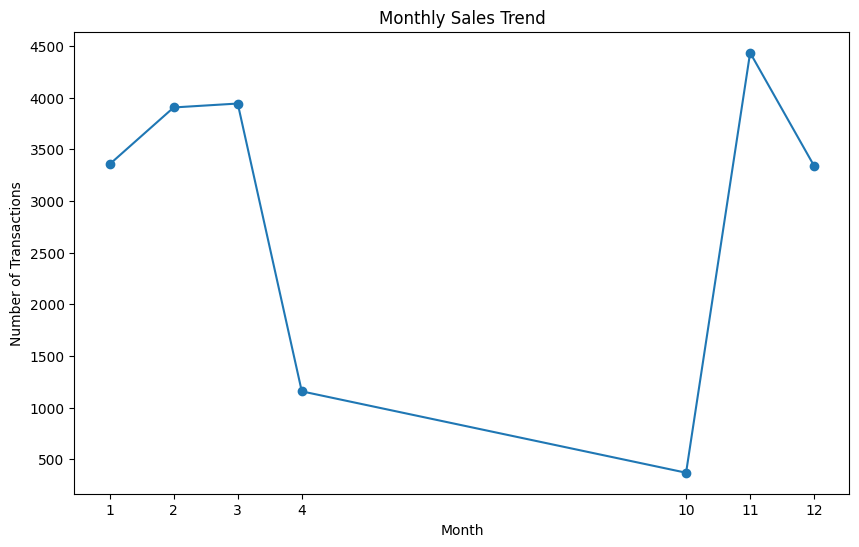

In [14]:
# 7
monthly_sales = df.groupby('Month')['Transaction'].count()

# Create the line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')

plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.title('Monthly Sales Trend')
plt.xticks(monthly_sales.index)


plt.show()

8. Now, the visualization above provides better insights: The visualization highlights seasonal transaction trends, with high activity in the first quarter (January-March), a sharp drop mid-year (notably in April), and a significant recovery in October, marking the year's peak. The decline from November to December suggests reduced activity toward year-end. These patterns can inform inventory, staffing, and promotional planning.. (fill that blank on the section below)

Next, I want to see if there's a trend for each day of the week in each month.
Oh, the dataframe has a column called weekday_weekend. What days include weekends and weekdays??

In [15]:
#9
unique_days = df['weekday_weekend'].unique()

# Separate weekday and weekend names
weekday_names = df[df['weekday_weekend'] == 'weekday']['Day_Name'].unique()
weekend_names = df[df['weekday_weekend'] == 'weekend']['Day_Name'].unique()

# Print the results
print("Unique weekday names:", weekday_names)
print("Unique weekend names:", weekend_names)

Unique weekday names: ['Monday' 'Tuesday' 'Wednesday' 'Thursday' 'Friday']
Unique weekend names: ['Sunday' 'Saturday']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Oh, okay, now I know that "weekend" refers to Sunday and Saturday. Alright, moving on, before creating the visualization, it seems necessary to create an aggregation with the columns for the month and day name, where the values represent the total transactions that occurred.

In [16]:
#10
# Group by month and day name, and count transactions
monthly_day_sales = df.groupby(['Month', 'Day_Name'])['Transaction'].count().reset_index()

# Pivot the table to have day names as columns
sales_table = pd.pivot_table(monthly_day_sales, values='Transaction', index='Month', columns='Day_Name', fill_value=0)

# Display the table
sales_table

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Day_Name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Month,,,,,,,
1,489.0,329.0,807.0,536.0,399.0,474.0,322.0
2,599.0,474.0,879.0,650.0,456.0,429.0,419.0
3,674.0,379.0,883.0,559.0,557.0,433.0,459.0
4,99.0,118.0,381.0,183.0,118.0,115.0,143.0
10,0.0,199.0,0.0,170.0,0.0,0.0,0.0
11,639.0,469.0,879.0,683.0,591.0,599.0,576.0
12,624.0,356.0,776.0,314.0,525.0,342.0,402.0


11. Wow, it turns out the insight that can be gained from the table above is the variation in transaction volumes across days of the week and months, with Saturdays consistently showing the highest activity in most months, while mid-week days like Tuesday and Wednesday generally see lower transactions. Additionally, April (Month 4) and October (Month 10) stand out with significantly lower activity, possibly indicating seasonal dips or specific operational factors.1


It seems ready to create the visualization now. Okay, I will create a comparison visualization of total sales per day for each month.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


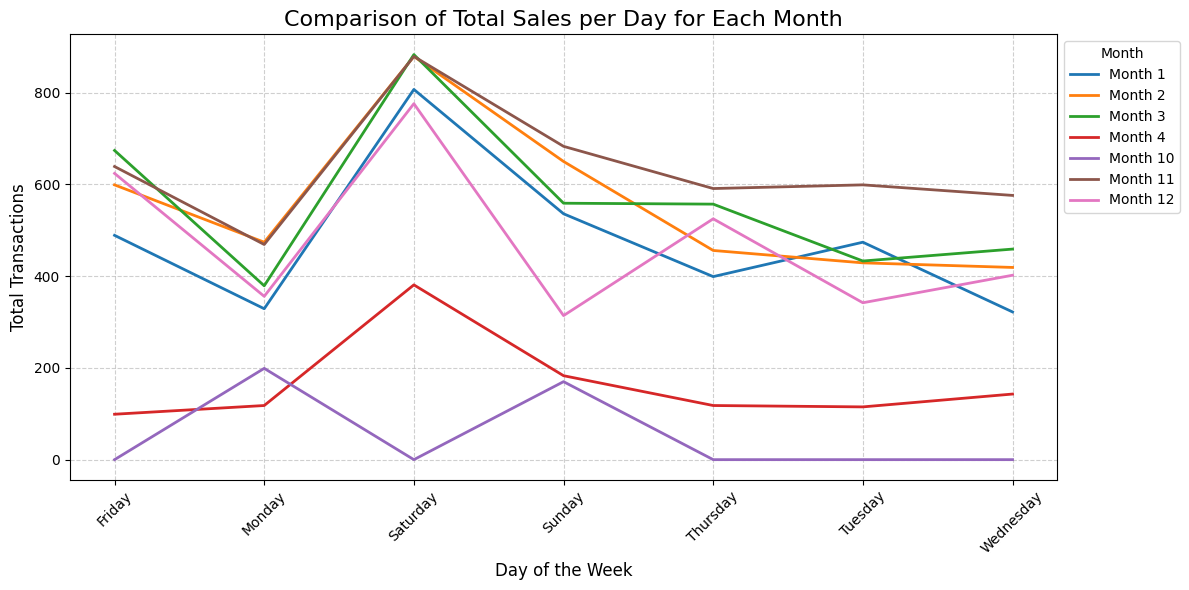

In [37]:
#12
pivot_table_t = sales_table.T

plt.figure(figsize=(12, 6))

for month in pivot_table_t.columns:
    plt.plot(pivot_table_t.index, pivot_table_t[month], label=f'Month {month}', linewidth=2, markersize=6)

plt.title('Comparison of Total Sales per Day for Each Month', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Transactions', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

plt.legend(title='Month', loc='upper left', bbox_to_anchor=(1, 1))

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()

13. Wow, after visualizing it like this, I can gain insights into the sales trends that highlight the performance variations across different days of the week for each month. For instance, Saturday consistently shows higher transaction volumes compared to other days, suggesting it is a peak sales day. Meanwhile, other days like Wednesday and Tuesday show lower activity, which might indicate opportunities for targeted promotions or strategies to boost sales on those days.

Oh, it turns out there's also a "period_day" column in the dataframe, but at the beginning, I only noticed "morning." Hmm, I'm curious, what other unique values could there be?

In [17]:
# 14
unique_periods = df['period_day'].unique()

# Print the unique values
print(unique_periods)

['morning' 'afternoon' 'evening' 'night']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Oh, okay, there are "morning," "afternoon," "evening," and "night."
But, but, but, what are the time ranges for morning, afternoon, evening, and night? Let me try to find out.

In [18]:
# 15
# Get unique hours for each period
morning_hours = df[df['period_day'] == 'morning']['Hour'].unique()
afternoon_hours = df[df['period_day'] == 'afternoon']['Hour'].unique()
evening_hours = df[df['period_day'] == 'evening']['Hour'].unique()
night_hours = df[df['period_day'] == 'night']['Hour'].unique()

# Print the unique hours for each period
print("Unique morning_hour:", morning_hours)
print("Unique afternoon_hour:", afternoon_hours)
print("Unique evening_hour:", evening_hours)
print("Unique night_hour:", night_hours)

Unique morning_hour: [ 9 10 11  8  7  1]
Unique afternoon_hour: [12 13 14 15 16]
Unique evening_hour: [17 18 19 20]
Unique night_hour: [21 23 22]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16. Hah, I found something odd in the results above. Did you notice it too? What do you think is odd about it and why?

in the morning_hour array, the value 1 stands out as unusual because it represents 1 a.m., which is typically considered part of the night rather than the morning. Generally, "morning" is understood to start around 6 or 7 a.m.

This inconsistency might have occurred due to a misclassification or a mistake in the categorization logic when defining the time ranges for each period of the day.


But that's okay, I'll just continue exploring the insights. It seems like I can create a sales analysis based on the hours of each day here.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


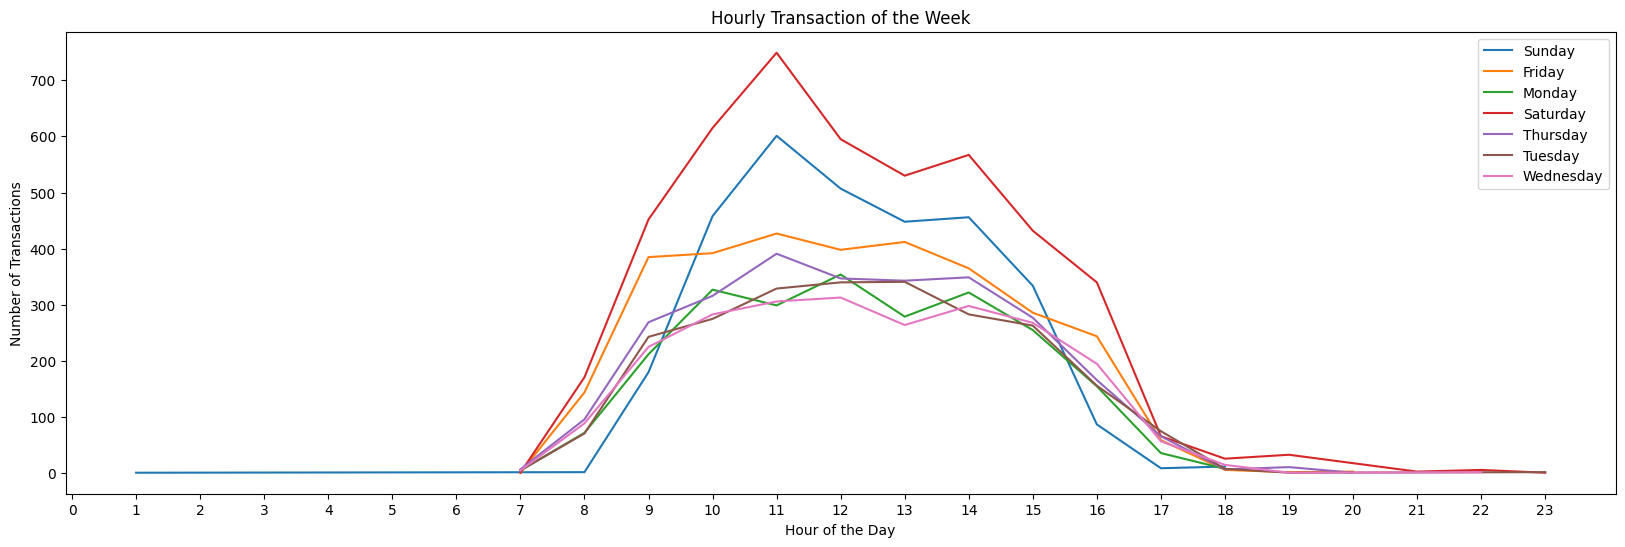

In [41]:
# 17
hourly_transactions = df.groupby(['Day_Name', 'Hour'])['Transaction'].count().reset_index()

# Filter for the specified days (Sunday to Wednesday)
days_to_show = ['Sunday', 'Friday', 'Monday', 'Saturday', 'Thursday','Tuesday', 'Wednesday',]
filtered_transactions = hourly_transactions[hourly_transactions['Day_Name'].isin(days_to_show)]

# Create the line chart
plt.figure(figsize=(20, 6))
for day in days_to_show:
    day_data = filtered_transactions[filtered_transactions['Day_Name'] == day]
    plt.plot(day_data['Hour'], day_data['Transaction'], label=day)

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.title('Hourly Transaction of the Week')
plt.legend()
plt.xticks(range(24))  # Ensure all hours are shown on the x-axis
plt.show()

18. The daily sales trend plot reveals that _______

The daily sales trend plot reveals that sales activity peaks during late morning to early afternoon (9:00–14:00), with Saturday standing out as the day with the highest transaction volume. This indicates that Saturdays may be the most popular shopping day, likely due to increased free time for customers.

Conversely, sales activity drops sharply after 14:00 and remains low through the evening and night, suggesting that customers are less active during those hours. Early morning hours (before 7:00) show negligible activity across all days, which is consistent with typical consumer behavior.

### **Item Popularity**
Curious about which items are most popular, I analyze the frequency of orders for each item.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


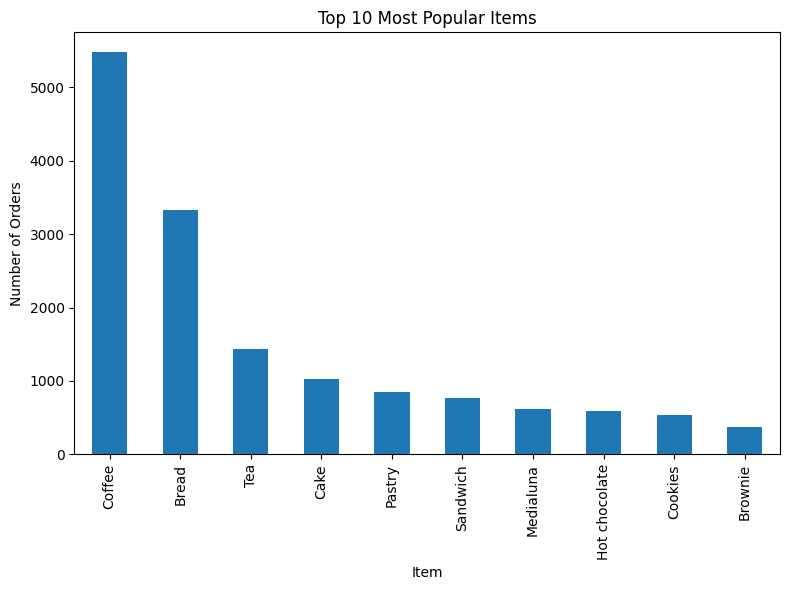

In [44]:
# 19
# Group by item and count occurrences
item_frequency = df.groupby('Item')['Transaction'].count().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
item_frequency.head(10).plot(kind='bar')

plt.xlabel('Item')
plt.ylabel('Number of Orders')
plt.title('Top 10 Most Popular Items')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

Hmm, but this is overall data. I want to create a visualization by period instead, maybe the highest sales vary by period.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-40-a093244e182e>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


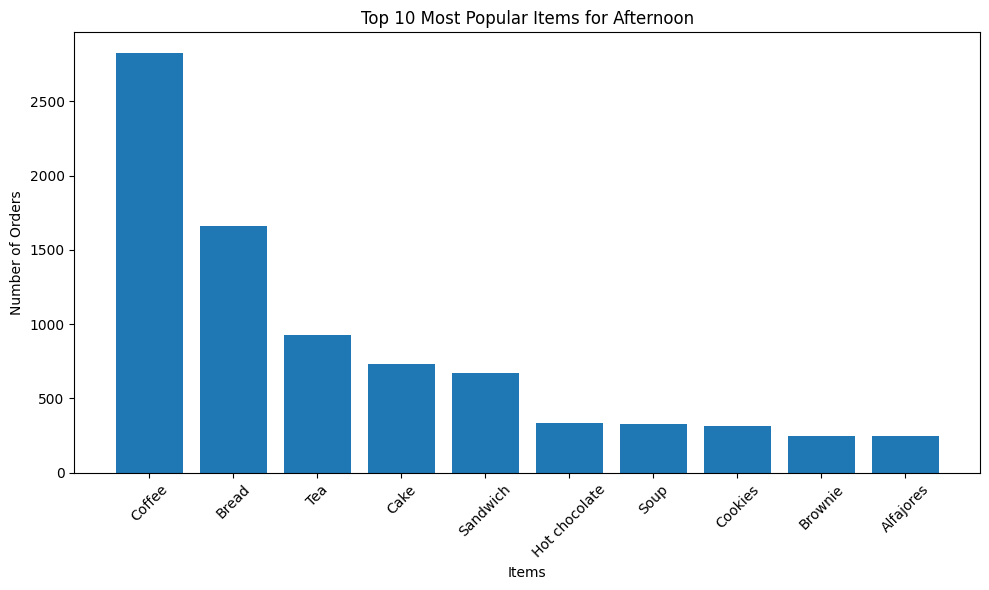

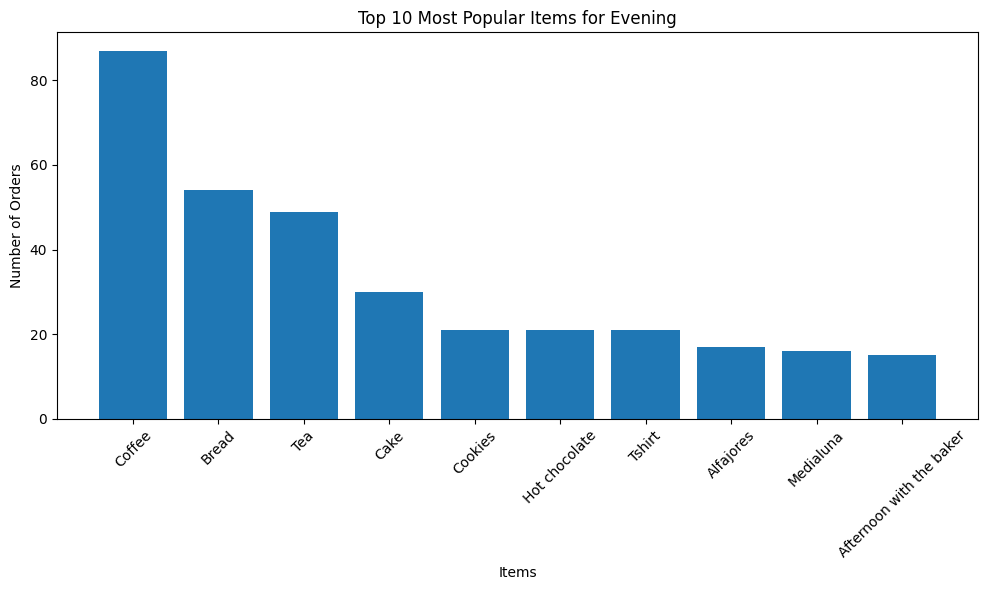

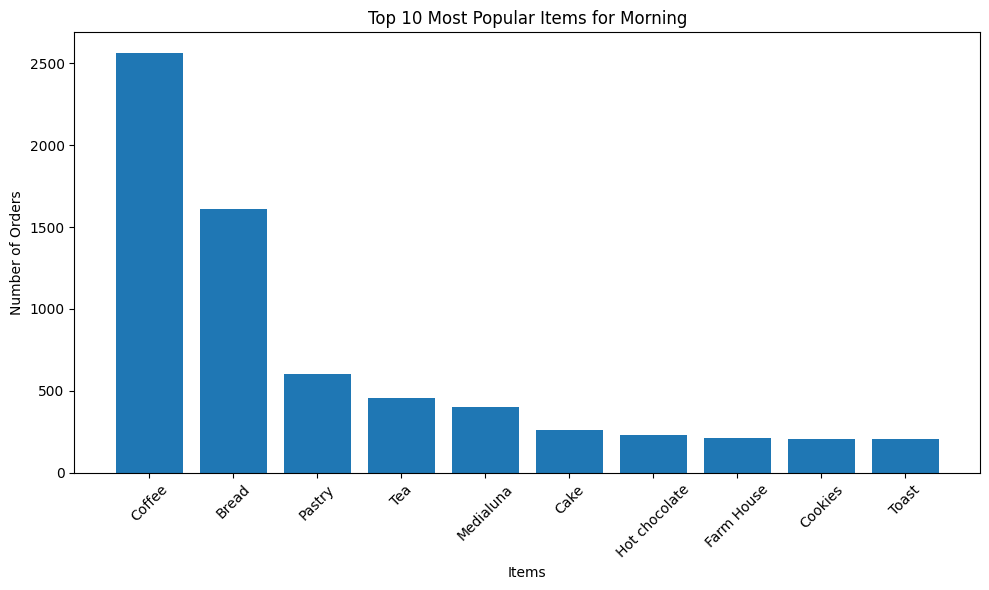

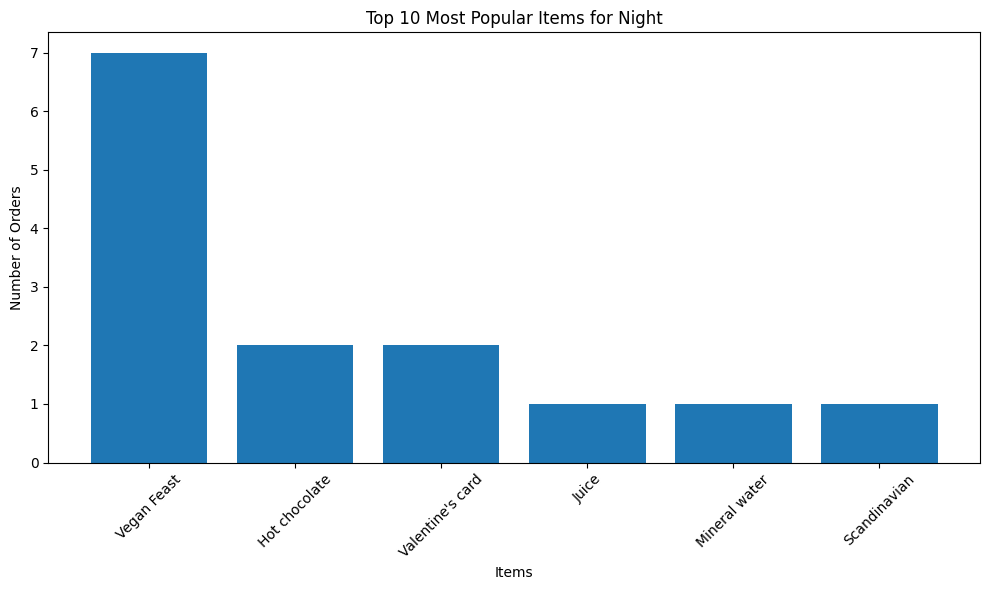

In [40]:
# 20
item_counts_by_period = df.groupby(['period_day', 'Item']).size().reset_index(name='count')

top_items_by_period = item_counts_by_period.groupby('period_day').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

periods = top_items_by_period['period_day'].unique()

for period in periods:
    data = top_items_by_period[top_items_by_period['period_day'] == period]

    plt.figure(figsize=(10, 6))

    plt.bar(data['Item'], data['count'])

    plt.xlabel('Items')
    plt.ylabel('Number of Orders')
    plt.title(f'Top 10 Most Popular Items for {period.capitalize()}')

    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

**21**. It turns out that there is something different in the plot above, the insight is The charts reveal that coffee dominates as the most popular item across all times, with significantly higher order volumes in the morning and afternoon compared to the evening. Bread is consistently the second favorite in the morning and afternoon but sees a drop in evening orders. The evening chart stands out with unique non-food items like "Tshirt" and "Afternoon with the baker," indicating a shift toward merchandise or events. Overall, the evening has much lower activity, while the morning and afternoon focus more on food and beverages, reflecting distinct customer preferences by time of day.


I found a valentine card, I was curious about when people bought it so I made a visualization of it

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-35-554fb7741852>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date


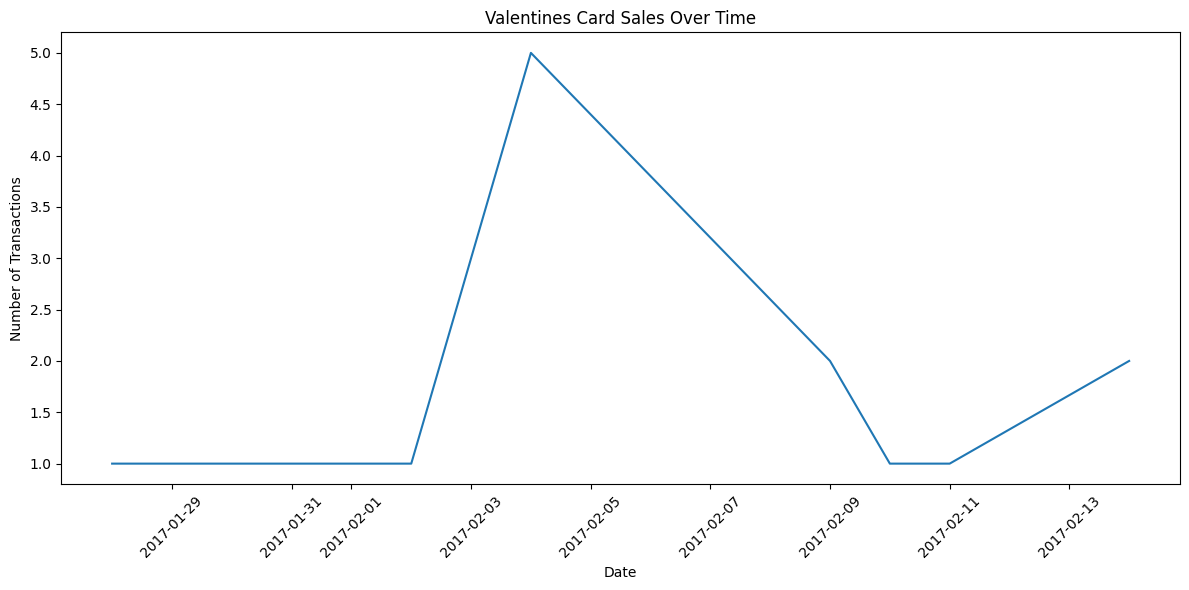

In [35]:
#22
Valentine_sales = df[df['Item'].str.contains('Valentine', case=False, na=False)]

valentine_sales['date'] = pd.to_datetime(valentine_sales['date_time']).dt.date
sales_by_date = valentine_sales.groupby('date').size()

plt.figure(figsize=(12, 6))
plt.plot(sales_by_date.index, sales_by_date.values, linestyle='-', label='Valentine Card Sales')

plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.title('Valentines Card Sales Over Time')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

23. I found the insight from the sale of the Valentine's cards above is The graph shows that Valentine's card sales peak significantly around February 3rd, followed by a sharp decline, with a small increase close to February 13th. This suggests an early rush of buyers, likely planning ahead, and a smaller group of last-minute shoppers just before Valentine's Day.


## **Applying the Apriori Algorithm**
With a solid understanding of the data, I shift my focus to identifying associations between items using the Apriori algorithm.

### **Data Preparation for Apriori**
I need to transform the dataset into a format suitable for the Apriori algorithm, where each transaction is represented as a row and each item as a column.

In [28]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

# Create a list of transactions
transactions = []
for transaction_id, group in df.groupby('Transaction'):
    item_list = group['Item'].tolist()
    transactions.append(item_list)

# Create a TransactionEncoder object
te = TransactionEncoder()

# Fit the encoder to the transactions
te_ary = te.fit(transactions).transform(transactions)

# Create a DataFrame from the encoded transactions
apriori_df = pd.DataFrame(te_ary, columns=te.columns_)

# Set Transaction as index using a list
apriori_df = apriori_df.set_index(pd.Index(list(df.groupby('Transaction').groups.keys()), name='Transaction'))

# Display the DataFrame
apriori_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
#25

# Convert quantities to 1 and 0
# Convert quantities to 1 and 0
basket_encoded = apriori_df.applymap(lambda x: 1 if x else 0)
basket_encoded.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-e27177a1afcf>:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_encoded = apriori_df.applymap(lambda x: 1 if x else 0)


,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### **Finding Frequent Itemsets**
Now, I apply the Apriori algorithm to find frequent itemsets with a minimum support threshold. This will help identify combinations of items that are frequently purchased together. (min_support=0.02, metric="lift", min_threshold=1)

In [31]:
# 26
from mlxtend.frequent_patterns import apriori

# Apply Apriori algorithm
frequent_itemsets = apriori(basket_encoded, min_support=0.02, use_colnames=True)

# Display frequent itemsets
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(Alfajores)
1,0.327205,(Bread)
2,0.040042,(Brownie)
3,0.103856,(Cake)
4,0.478394,(Coffee)
5,0.054411,(Cookies)
6,0.039197,(Farm House)
7,0.058320,(Hot chocolate)
8,0.038563,(Juice)
9,0.061807,(Medialuna)


In [48]:
#27
# Importing necessary libraries
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Data preprocessing
df = df.dropna()  # Remove any null entries
df['Item'] = df['Item'].str.strip()  # Remove extra whitespace

# Create a one-hot encoded dataframe for transactions
transactions = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')
transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)

# Generate frequent itemsets using the Apriori algorithm
frequent_itemsets = apriori(transactions, min_support=0.02, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.02)

# Calculate Zhang's Metric
confidence_diff = 1 - rules['confidence']  # Calculate (1 - confidence) separately
rules['zhangs_metric'] = (rules['confidence'] - rules['consequent support']) / \
                         pd.concat([rules['confidence'], confidence_diff], axis=1).max(axis=1)

# Sort and format the rules for readability
rules = rules.sort_values(by='support', ascending=False)
rules = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support',
               'support', 'confidence', 'lift', 'leverage', 'conviction', 'zhangs_metric']]

# Convert frozensets to strings for better display
rules['antecedents'] = rules['antecedents'].apply(lambda x: ', '.join(list(x)))
rules['consequents'] = rules['consequents'].apply(lambda x: ', '.join(list(x)))

# Display the DataFrame (in Jupyter Notebook or other environments)
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-48-347a11abca24>:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transactions = transactions.applymap(lambda x: 1 if x > 0 else 0)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,Coffee,Bread,0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.171269
3,Bread,Coffee,0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.280439
8,Cake,Coffee,0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.092159
9,Coffee,Cake,0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.011905
24,Coffee,Tea,0.478394,0.142631,0.049868,0.104240,0.730840,-0.018366,0.957142,-0.042858
25,Tea,Coffee,0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014,-0.197986
21,Pastry,Coffee,0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.133575
20,Coffee,Pastry,0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740,0.014740
22,Coffee,Sandwich,0.478394,0.071844,0.038246,0.079947,1.112792,0.003877,1.008807,0.008807
23,Sandwich,Coffee,0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384,0.101359


## Conclusion: The Impact of Data Analysis
28. As my day of analysis comes to a close, I compile my findings into a comprehensive report that highlights several key insights derived from The Bread Basket dataset:



My analysis of The Bread Basket dataset reveals key insights for optimizing operations and enhancing customer satisfaction. Sales are significantly higher on weekends, particularly during November and February, with daily peaks between 10 AM and 12 PM. Coffee is the most popular item, followed by bread, tea, and cake. While coffee remains a constant favorite, pastries are preferred in the morning and sandwiches in the afternoon. Valentine's card sales surge around Valentine's Day, highlighting the potential for seasonal promotions. Notably, coffee is frequently purchased with toast, medialuna, pastries, juice, and sandwiches, suggesting opportunities for bundled offers. Bread and pastry also show a strong association, prompting cross-selling strategies. These insights suggest optimizing staffing and inventory during peak hours and weekends, capitalizing on seasonal trends, highlighting popular and associated items on the menu, and implementing targeted promotions. By leveraging these data-driven strategies, The Bread Basket can enhance operational efficiency, maximize profitability, and improve customer experience. Further analysis with expanded data and customer demographics could provide deeper insights for personalized offerings and marketing campaigns.